# Forecast Apple and Microsoft
- CODE: [DanielWicz](https://gist.github.com/DanielWicz/e2f90648e46da599080fed70d11cc09c)

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# Uncomment and use below if you have access to internet and yfinance installed
# !pip install yfinance
import yfinance as yf

# This function fetches the stock prices for a given ticker symbol between specified start and end dates.
def fetch_data(ticker, start_date, end_date):
    # Download the stock price data for the given ticker using the yfinance library.
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Return only the 'Close' prices from the downloaded data.
    return data['Close']


apple_prices = fetch_data('AAPL', '2011-01-01', '2021-01-01')
microsoft_prices = fetch_data('MSFT', '2011-01-01', '2021-01-01')

# otherwise there's a placeholder

# Placeholder data
# dates = pd.date_range('2020-01-01', '2021-01-01', freq='B')
# apple_prices = pd.Series(np.random.rand(len(dates)) + 150, index=dates)
# microsoft_prices = pd.Series(np.random.rand(len(dates)) + 210, index=dates)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
apple_prices

Date
2011-01-03     11.770357
2011-01-04     11.831786
2011-01-05     11.928571
2011-01-06     11.918929
2011-01-07     12.004286
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: Close, Length: 2517, dtype: float64

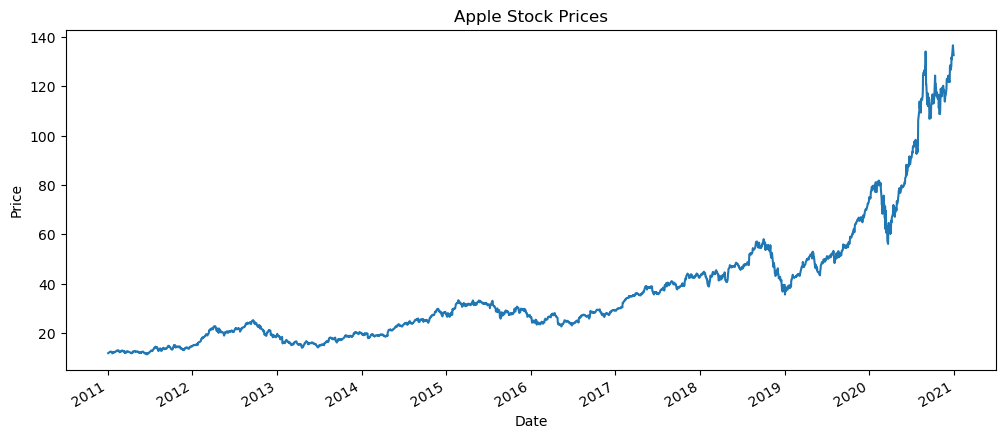

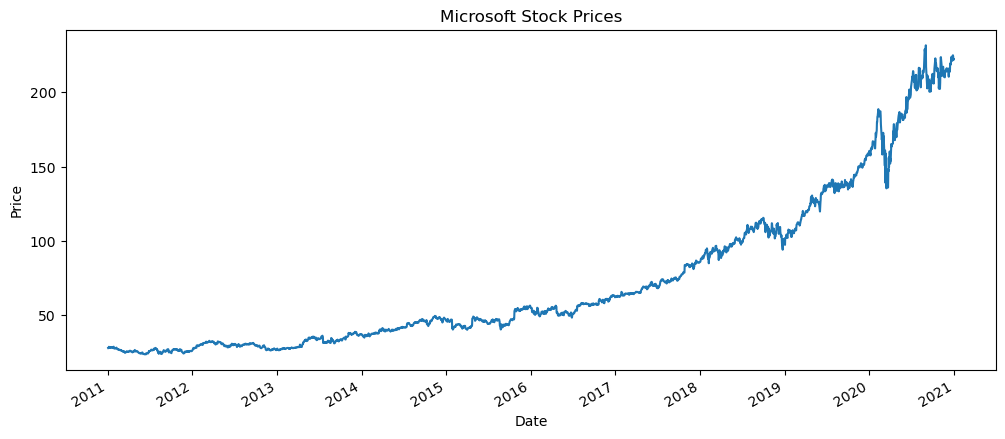

In [3]:
# Visualizing Stock Prices

# This function visualizes the stock prices in a simple line plot.
def plot_prices(stock_data, stock_name):
    # Plot the stock prices with a specified figure size and title.
    stock_data.plot(figsize=(12, 5), title=stock_name)
    
    # Label the y-axis as 'Price'.
    plt.ylabel('Price')
    
    # Display the plot.
    plt.show()

# Plotting the Apple stock prices.
plot_prices(apple_prices, 'Apple Stock Prices')

# Plotting the Microsoft stock prices.
plot_prices(microsoft_prices, 'Microsoft Stock Prices')



In [7]:
len(apple_prices)-1

2516

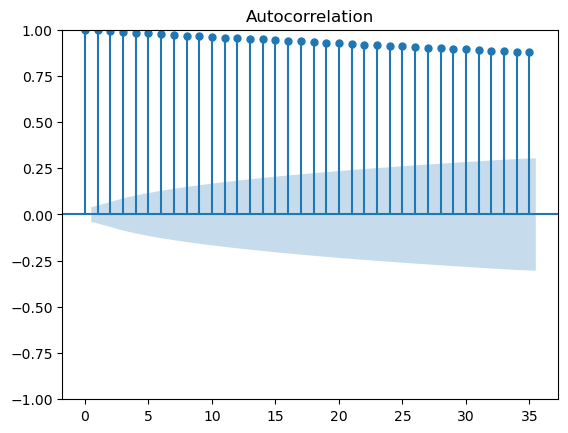

[ 1.          0.99594427  0.99201201 ... -0.00474258 -0.00314915
 -0.00156817]


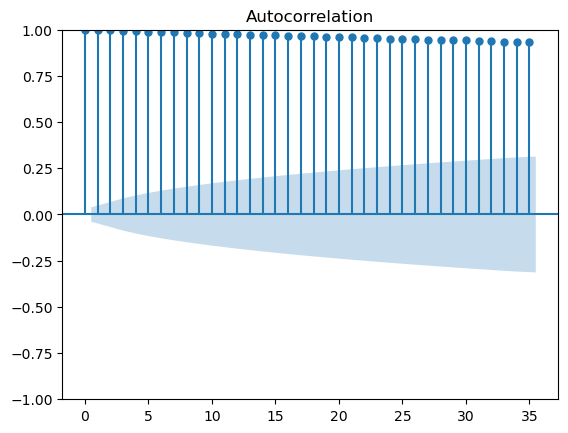

[ 1.00000000e+00  9.97641763e-01  9.95611345e-01 ... -2.95861249e-03
 -1.96266147e-03 -9.84973186e-04]


In [8]:
# Importing the acf function from statsmodels to compute autocorrelation values.
from statsmodels.tsa.stattools import acf

# This function identifies significant lags based on autocorrelation values.
def significant_lags(stock_data, threshold=0.1):
    # Visualize the autocorrelation of the stock data using a built-in function.
    plot_acf(stock_data)
    
    # Display the autocorrelation plot.
    plt.show()
    
    # Compute the autocorrelation values for the stock data using the acf function.
    autocorrelations = acf(stock_data, nlags=len(stock_data)-1, fft=True)
    print(autocorrelations)
    
    # Identify and return the lags where the autocorrelation is above the threshold.
    # We skip the first value (lag 0) as it's the correlation with itself and always equals 1.
    return [i+1 for i, autocorr in enumerate(autocorrelations[1:]) if autocorr > threshold]

# Identify significant lags for the Apple stock prices.
lags_apple = significant_lags(apple_prices)

# Identify significant lags for the Microsoft stock prices.
lags_microsoft = significant_lags(microsoft_prices)

# Long term prediction - 366 days 

In [9]:
# Hyperparameters 
# lags to consider in AutoRegression model
print(f'Lags considered for Apple {len(lags_apple)}, {lags_apple}\n')
print(f'Lags considered for Microsoft {lags_apple}\n')


# number of test examples (as days)
days_to_predict = 366
print(f'Test days considered {days_to_predict}\n')
print(f'Training days considered {apple_prices.shape[0] - days_to_predict}\n')


# the \n just signifies a new line, f before string allows to directly refer to a variable

Lags considered for Apple 738, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 2

In [15]:
# Building the AutoRegressive Model

def train_autoreg_model(stock_data, lags):
    return AutoReg(stock_data, lags=lags).fit()

model_apple = train_autoreg_model(apple_prices[:-days_to_predict], lags_apple)
model_microsoft = train_autoreg_model(microsoft_prices[:-days_to_predict], lags_microsoft)


/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


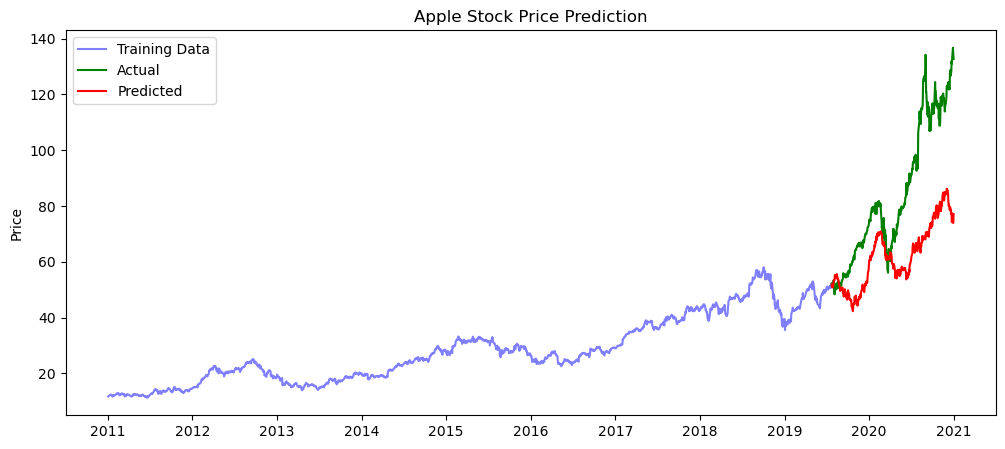

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


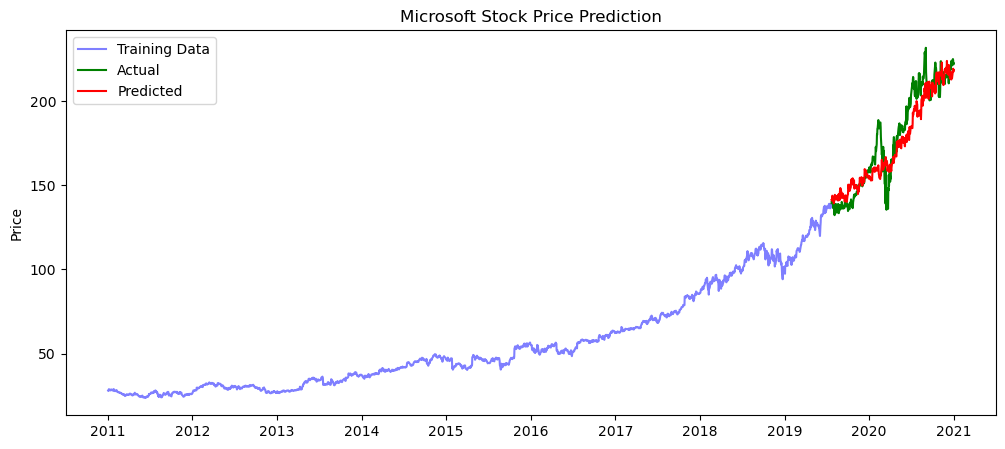

In [16]:
def plot_predictions(model, train_data, test_data, stock_name):
    start = len(train_data)
    end = start + len(test_data) - 1
    prediction = model.predict(start=start, end=end, dynamic=True)
    
    plt.figure(figsize=(12, 5))
    
    # Plotting the training data
    plt.plot(train_data.index, train_data.values, label='Training Data', color='blue', alpha=0.5)
    
    # Plotting the actual test data
    plt.plot(test_data.index, test_data.values, label='Actual', color='green')
    
    # Plotting the predicted values
    plt.plot(test_data.index, prediction, label='Predicted', color='red')
    
    plt.title(stock_name + ' Stock Price Prediction')
    plt.ylabel('Price')
    plt.legend()
    # plt.savefig(f'{stock_name}.png', dpi=200)
    plt.show()

    
# Assuming we've split our data into train and test before
train_apple = apple_prices[:-days_to_predict]
test_apple = apple_prices[-days_to_predict:]
train_microsoft = microsoft_prices[:-days_to_predict]
test_microsoft = microsoft_prices[-days_to_predict:]

plot_predictions(model_apple, train_apple, test_apple, 'Apple')
plot_predictions(model_microsoft, train_microsoft, test_microsoft, 'Microsoft')


/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


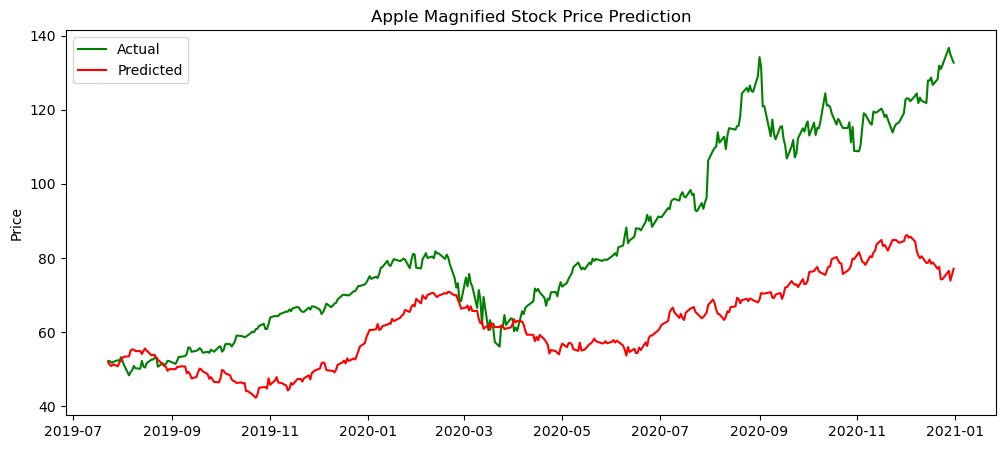

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


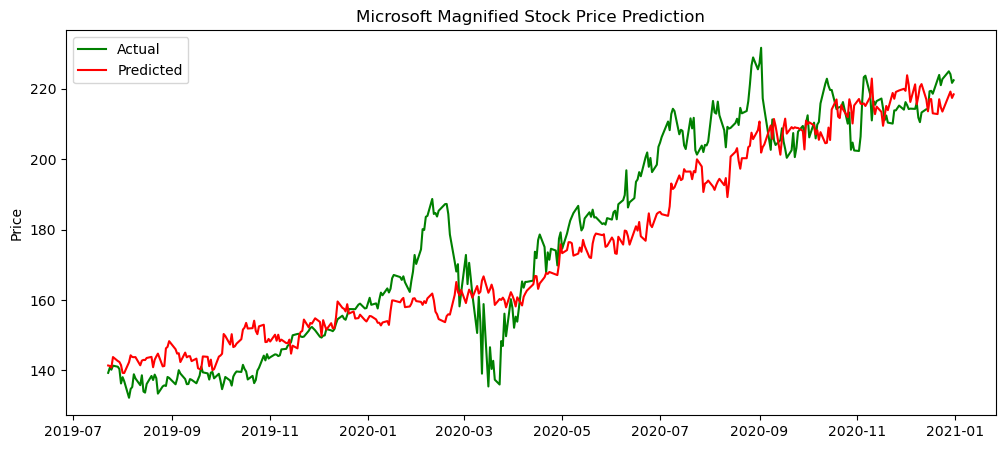

In [17]:
def plot_magnified_predictions(model, train_data, test_data, stock_name):
    # Adjusting the prediction start and end based on the original series
    start = len(train_data)
    end = start + len(test_data) - 1
    prediction = model.predict(start=start, end=end, dynamic=True)
    
    plt.figure(figsize=(12, 5))
    
    # Plotting the actual test data
    plt.plot(test_data.index, test_data.values, label='Actual', color='green')
    
    # Plotting the predicted values
    plt.plot(test_data.index, prediction, label='Predicted', color='red')
    
    plt.title(stock_name + ' Magnified Stock Price Prediction')
    plt.ylabel('Price')
    plt.legend()
    # plt.savefig(f'{stock_name}_magnified.png', dpi=200)
    plt.show()

plot_magnified_predictions(model_apple, train_apple, test_apple, 'Apple')
plot_magnified_predictions(model_microsoft, train_microsoft, test_microsoft, 'Microsoft')


# Short term prediction 10 days

In [18]:
# Hyperparameters 
# lags to consider in AutoRegression model
print(f'Lags considered for Apple {lags_apple}\n')
print(f'Lags considered for Microsoft {lags_apple}\n')


# number of test examples (as days)
days_to_predict = 10
print(f'Test days considered {days_to_predict}\n')
print(f'Training days considered {apple_prices.shape[0] - days_to_predict}\n')


# the \n just signifies a new line, f before string allows to directly refer to a variable

Lags considered for Apple [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

In [19]:
train_data = apple_prices[:-days_to_predict]
train_data

Date
2011-01-03     11.770357
2011-01-04     11.831786
2011-01-05     11.928571
2011-01-06     11.918929
2011-01-07     12.004286
                 ...    
2020-12-10    123.239998
2020-12-11    122.410004
2020-12-14    121.779999
2020-12-15    127.879997
2020-12-16    127.809998
Name: Close, Length: 2507, dtype: float64

In [20]:
# Building the AutoRegressive Model

def train_autoreg_model(stock_data, lags):
    return AutoReg(stock_data, lags=lags).fit()

model_apple = train_autoreg_model(apple_prices[:-days_to_predict], lags_apple)
model_microsoft = train_autoreg_model(microsoft_prices[:-days_to_predict], lags_microsoft)


/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
# apple_prices[:-days_to_predict].values

array([ 11.77035713,  11.83178616,  11.92857075, ..., 121.77999878,
       127.87999725, 127.80999756])

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


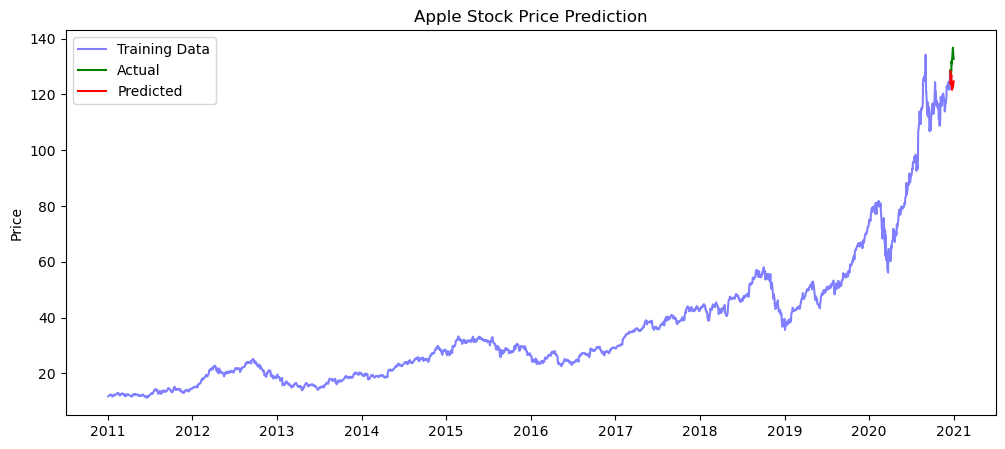

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


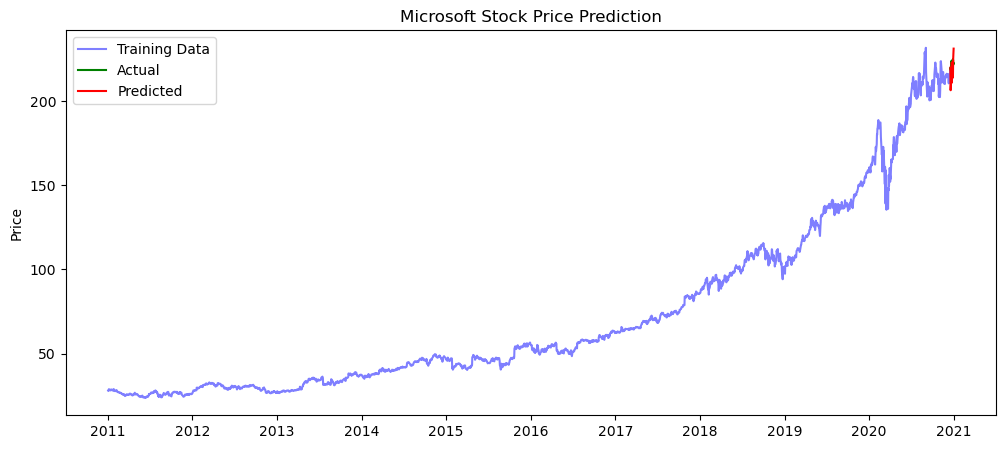

In [11]:
def plot_predictions(model, train_data, test_data, stock_name):
    start = len(train_data)
    end = start + len(test_data) - 1
    prediction = model.predict(start=start, end=end, dynamic=True)
    
    plt.figure(figsize=(12, 5))
    
    # Plotting the training data
    plt.plot(train_data.index, train_data.values, label='Training Data', color='blue', alpha=0.5)
    
    # Plotting the actual test data
    plt.plot(test_data.index, test_data.values, label='Actual', color='green')
    
    # Plotting the predicted values
    plt.plot(test_data.index, prediction, label='Predicted', color='red')
    
    plt.title(stock_name + ' Stock Price Prediction')
    plt.ylabel('Price')
    plt.legend()
    # plt.savefig(f'{stock_name}_10days.png', dpi=200)
    plt.show()

# How m
    
# Assuming we've split our data into train and test before
train_apple = apple_prices[:-days_to_predict]
test_apple = apple_prices[-days_to_predict:]
train_microsoft = microsoft_prices[:-days_to_predict]
test_microsoft = microsoft_prices[-days_to_predict:]

plot_predictions(model_apple, train_apple, test_apple, 'Apple')
plot_predictions(model_microsoft, train_microsoft, test_microsoft, 'Microsoft')


/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


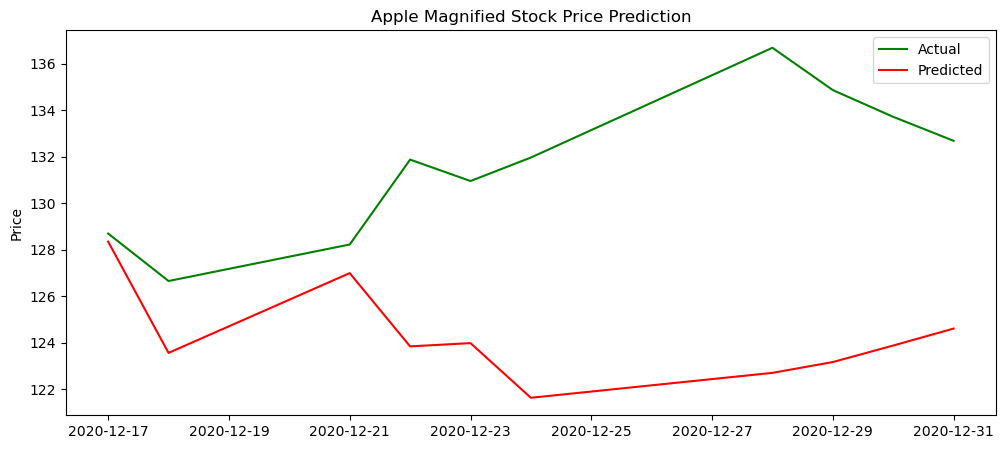

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


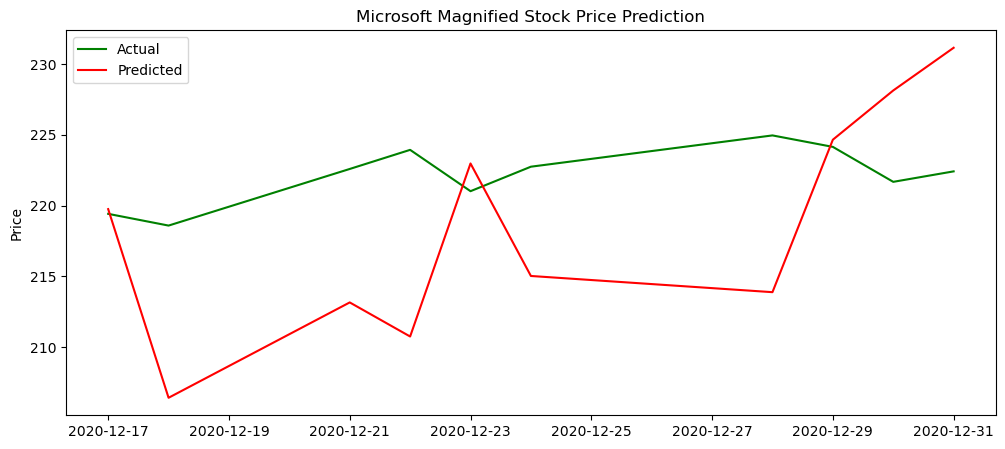

In [12]:
def plot_magnified_predictions(model, train_data, test_data, stock_name):
    # Adjusting the prediction start and end based on the original series
    start = len(train_data)
    end = start + len(test_data) - 1
    prediction = model.predict(start=start, end=end, dynamic=True)
    
    plt.figure(figsize=(12, 5))
    
    # Plotting the actual test data
    plt.plot(test_data.index, test_data.values, label='Actual', color='green')
    
    # Plotting the predicted values
    plt.plot(test_data.index, prediction, label='Predicted', color='red')
    
    plt.title(stock_name + ' Magnified Stock Price Prediction')
    plt.ylabel('Price')
    plt.legend()
    # plt.savefig(f'{stock_name}_magnified_10days.png', dpi=200)
    plt.show()

plot_magnified_predictions(model_apple, train_apple, test_apple, 'Apple')
plot_magnified_predictions(model_microsoft, train_microsoft, test_microsoft, 'Microsoft')
